## read road network from .graphml file

In [1]:
import osmnx as ox 

In [2]:
shanghai_road = ox.load_graphml(filename='shanghai.graphml', folder='./data/osm/shanghai_road')

In [3]:
ox.basic_stats(shanghai_road)

{'circuity_avg': 1.0478972678668819,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None,
 'edge_density_km': None,
 'edge_length_avg': 219.37581520956905,
 'edge_length_total': 44472304.01091426,
 'intersection_count': 66184,
 'intersection_density_km': None,
 'k_avg': 5.053710097598065,
 'm': 202722,
 'n': 80227,
 'node_density_km': None,
 'self_loop_proportion': 0.0017413008948214796,
 'street_density_km': None,
 'street_length_avg': 233.14840585173718,
 'street_length_total': 27276731.44581229,
 'street_segments_count': 116993,
 'streets_per_node_avg': 2.9139192541164447,
 'streets_per_node_counts': {0: 0,
  1: 14043,
  2: 307,
  3: 44968,
  4: 20383,
  5: 478,
  6: 44,
  7: 4},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.1750408216685156,
  2: 0.0038266419035985393,
  3: 0.5605095541401274,
  4: 0.25406658606204896,
  5: 0.0059580939085345334,
  6: 0.0005484437907437645,
  7: 4.985852643125132e-05}}

In [4]:
type(shanghai_road)

networkx.classes.multidigraph.MultiDiGraph

### to pandas edge list

In [5]:
import networkx as nx
df_edges = nx.to_pandas_edgelist(shanghai_road)

In [6]:
df_edges.head()

,access,area,bridge,geometry,highway,junction,landuse,lanes,length,maxspeed,name,oneway,osmid,ref,service,source,target,tunnel,width
0,NaN,NaN,NaN,NaN,residential,NaN,NaN,NaN,32.741578,NaN,NaN,False,280965789,NaN,NaN,2849898496,2849898499,NaN,NaN
1,NaN,NaN,NaN,"LINESTRING (121.6359771 31.2212033, 121.636548...",residential,NaN,NaN,NaN,162.024249,NaN,NaN,False,"[280965809, 280965811]",NaN,NaN,2849898496,2849898493,NaN,NaN
2,NaN,NaN,NaN,"LINESTRING (121.6359771 31.2212033, 121.636042...",residential,NaN,NaN,NaN,76.233443,NaN,NaN,False,280965789,NaN,NaN,2849898496,2849898483,NaN,NaN
3,NaN,NaN,NaN,"LINESTRING (121.3905549 31.1771629, 121.391149...",tertiary,NaN,NaN,2,379.784880,NaN,虹梅路,False,8882129,NaN,NaN,835125248,835125242,NaN,NaN
4,NaN,NaN,NaN,"LINESTRING (121.3905549 31.1771629, 121.388826...",tertiary,NaN,NaN,NaN,285.030519,NaN,环镇南路,False,240980015,NaN,NaN,835125248,864224126,NaN,NaN


In [14]:
nodes_gdf, edges_gdf = ox.graph_to_gdfs(shanghai_road)

In [17]:
len(nodes_gdf), len(edges_gdf)

(80227, 202722)

In [18]:
len(nodes_gdf.dropna(axis=1, how='any')), len(edges_gdf.dropna(axis=1, how='any'))

(80227, 202722)

In [15]:
edges_gdf.dropna(axis=1, how='any').head()

,geometry,highway,key,length,oneway,osmid,u,v
0,"LINESTRING (121.6359771 31.2212033, 121.635873...",residential,0,32.741578,False,280965789,2849898496,2849898499
1,"LINESTRING (121.6359771 31.2212033, 121.636548...",residential,0,162.024249,False,"[280965809, 280965811]",2849898496,2849898493
2,"LINESTRING (121.6359771 31.2212033, 121.636042...",residential,0,76.233443,False,280965789,2849898496,2849898483
3,"LINESTRING (121.3905549 31.1771629, 121.391149...",tertiary,0,379.784880,False,8882129,835125248,835125242
4,"LINESTRING (121.3905549 31.1771629, 121.388826...",tertiary,0,285.030519,False,240980015,835125248,864224126


In [16]:
nodes_gdf.dropna(axis=1, how='any').head()

,osmid,x,y,geometry
61104104,61104104,121.579,31.2443,POINT (121.5791369 31.2442536)
61104668,61104668,121.571,31.2407,POINT (121.571341 31.2407391)
61104683,61104683,121.571,31.242,POINT (121.5705486 31.24196)
61104687,61104687,121.572,31.2387,POINT (121.5722299 31.2386602)
61114908,61114908,121.565,31.239,POINT (121.5650105 31.239023)


In [19]:
edges_gdf.rename(columns={'u':'from', 'v':'to'}).head()

,access,area,bridge,geometry,highway,junction,key,landuse,lanes,length,maxspeed,name,oneway,osmid,ref,service,tunnel,from,to,width
0,NaN,NaN,NaN,"LINESTRING (121.6359771 31.2212033, 121.635873...",residential,NaN,0,NaN,NaN,32.741578,NaN,NaN,False,280965789,NaN,NaN,NaN,2849898496,2849898499,NaN
1,NaN,NaN,NaN,"LINESTRING (121.6359771 31.2212033, 121.636548...",residential,NaN,0,NaN,NaN,162.024249,NaN,NaN,False,"[280965809, 280965811]",NaN,NaN,NaN,2849898496,2849898493,NaN
2,NaN,NaN,NaN,"LINESTRING (121.6359771 31.2212033, 121.636042...",residential,NaN,0,NaN,NaN,76.233443,NaN,NaN,False,280965789,NaN,NaN,NaN,2849898496,2849898483,NaN
3,NaN,NaN,NaN,"LINESTRING (121.3905549 31.1771629, 121.391149...",tertiary,NaN,0,NaN,2,379.784880,NaN,虹梅路,False,8882129,NaN,NaN,NaN,835125248,835125242,NaN
4,NaN,NaN,NaN,"LINESTRING (121.3905549 31.1771629, 121.388826...",tertiary,NaN,0,NaN,NaN,285.030519,NaN,环镇南路,False,240980015,NaN,NaN,NaN,835125248,864224126,NaN


### Creat index

In [21]:
e_sindex = edges_gdf.sindex

In [ ]:
e_sindex.intersection()

In [4]:
shanghai_road[2849898496] 

AdjacencyView({2849898499L: {0: {'length': 32.7415775755, 'osmid': 280965789, 'highway': u'residential', 'oneway': False}}, 2849898493L: {0: {'geometry': <shapely.geometry.linestring.LineString object at 0x00000000664BFE48>, 'length': 162.024249192, 'osmid': [280965809, 280965811], 'highway': u'residential', 'oneway': False}}, 2849898483L: {0: {'geometry': <shapely.geometry.linestring.LineString object at 0x00000000664BFE80>, 'length': 76.2334427982, 'osmid': 280965789, 'highway': u'residential', 'oneway': False}}})

In [5]:
print(shanghai_road[2849898496][2849898493][0]['geometry'])

LINESTRING (121.6359771 31.2212033, 121.6365481 31.2213673, 121.6369344 31.2214628, 121.6372043 31.220911)


In [6]:
'geometry' in shanghai_road[2849898496L][2849898499L][0]

False

In [7]:
'geometry' in shanghai_road[2849898496][2849898493][0]

True

In [8]:
list(shanghai_road.edges(data=True))

[(2849898496L,
  2849898499L,
  {'highway': u'residential',
   'length': 32.7415775755,
   'oneway': False,
   'osmid': 280965789}),
 (2849898496L,
  2849898493L,
  {'geometry': <shapely.geometry.linestring.LineString at 0x664bfe48>,
   'highway': u'residential',
   'length': 162.024249192,
   'oneway': False,
   'osmid': [280965809, 280965811]}),
 (2849898496L,
  2849898483L,
  {'geometry': <shapely.geometry.linestring.LineString at 0x664bfe80>,
   'highway': u'residential',
   'length': 76.2334427982,
   'oneway': False,
   'osmid': 280965789}),
 (835125248,
  835125242,
  {'geometry': <shapely.geometry.linestring.LineString at 0x664bfd68>,
   'highway': u'tertiary',
   'lanes': u'2',
   'length': 379.784880246,
   'name': u'\u8679\u6885\u8def',
   'oneway': False,
   'osmid': 8882129}),
 (835125248,
  864224126,
  {'geometry': <shapely.geometry.linestring.LineString at 0x664bfd30>,
   'highway': u'tertiary',
   'length': 285.030518994,
   'name': u'\u73af\u9547\u5357\u8def',
   'one

In [9]:
import geopandas as gpd
from shapely.geometry import Point, LineString

froms=[]
tos=[]
geometries = []
for e_from, e_to, data in shanghai_road.edges(data=True):
    froms.append(e_from)
    tos.append(e_to)
    if 'geometry' in data:
        geometries.append(data['geometry'])        
    else:
        p1 = Point(shanghai_road.nodes[e_from]['x'], shanghai_road.nodes[e_from]['y'])
        p2 = Point(shanghai_road.nodes[e_to]['x'], shanghai_road.nodes[e_to]['y'])
        geometries.append(LineString((p1, p2)))
        
gpd_edges = gpd.GeoDataFrame(data={'from':froms, 'to':tos, 'geometry':geometries})
gpd_edges.crs = shanghai_road.graph['crs']
gpd_edges.name = 'edges'
gpd_edges.head()

,from,geometry,to
0,2849898496,"LINESTRING (121.6359771 31.2212033, 121.635873...",2849898499
1,2849898496,"LINESTRING (121.6359771 31.2212033, 121.636548...",2849898493
2,2849898496,"LINESTRING (121.6359771 31.2212033, 121.636042...",2849898483
3,835125248,"LINESTRING (121.3905549 31.1771629, 121.391149...",835125242
4,835125248,"LINESTRING (121.3905549 31.1771629, 121.388826...",864224126


In [10]:
shanghai_road[2849898496][2849898493][0]['geometry'].bounds

(121.6359771, 31.220911, 121.6372043, 31.2214628)

In [13]:
gpd_edges['bbox'] = gpd_edges.apply(lambda row: row['geometry'].bounds, axis = 1)
gpd_edges.head()

,from,geometry,to,bbox
0,2849898496,"LINESTRING (121.6359771 31.2212033, 121.635873...",2849898499,"(121.6358731, 31.2212033, 121.6359771, 31.221484)"
1,2849898496,"LINESTRING (121.6359771 31.2212033, 121.636548...",2849898493,"(121.6359771, 31.220911, 121.6372043, 31.2214628)"
2,2849898496,"LINESTRING (121.6359771 31.2212033, 121.636042...",2849898483,"(121.6359771, 31.2205594, 121.6362516, 31.2212..."
3,835125248,"LINESTRING (121.3905549 31.1771629, 121.391149...",835125242,"(121.3905549, 31.1739992, 121.391989, 31.1771629)"
4,835125248,"LINESTRING (121.3905549 31.1771629, 121.388826...",864224126,"(121.3876428, 31.1765605, 121.3905549, 31.1771..."


In [14]:
# r-tree index for edges
from rtree import index
p = index.Property()
idx = index.Index(properties=p)
idx

In [15]:
idx.insert(0,gpd_edges.iloc[0]['bbox'],obj=gpd_edges.iloc[0])

In [16]:
gpd_edges.index

RangeIndex(start=0, stop=202722, step=1)

In [17]:
for index, row in gpd_edges.iterrows():
    idx.insert(index, row['bbox'], obj=row)

In [19]:
hits = idx.nearest((121.6359771 ,31.2212033, 121.6359771, 31.2212033), 3, objects=True)
[(item.object, item.bbox) for item in hits]

[(from                                               2849898496
  geometry    LINESTRING (121.6359771 31.2212033, 121.636042...
  to                                                 2849898483
  bbox        (121.6359771, 31.2205594, 121.6362516, 31.2212...
  Name: 2, dtype: object, [121.6359771, 31.2205594, 121.6362516, 31.2212033]),
 (from                                               2849898496
  geometry    LINESTRING (121.6359771 31.2212033, 121.635873...
  to                                                 2849898499
  bbox        (121.6358731, 31.2212033, 121.6359771, 31.221484)
  Name: 0, dtype: object, [121.6358731, 31.2212033, 121.6359771, 31.221484]),
 (from                                               2849898496
  geometry    LINESTRING (121.6359771 31.2212033, 121.635873...
  to                                                 2849898499
  bbox        (121.6358731, 31.2212033, 121.6359771, 31.221484)
  Name: 0, dtype: object, [121.6358731, 31.2212033, 121.6359771, 31.221484]

# coordinate projection

In [20]:
shanghai_road_utm = ox.project_graph(shanghai_road)

In [21]:
shanghai_road_utm.graph['crs']

{'datum': 'WGS84', 'ellps': 'WGS84', 'proj': 'utm', 'units': 'm', 'zone': 51}

# build index for road segments

In [24]:
# transform edges into geopandas dataframe
def to_edge_gdf(road):
    ''' 
    input: 
        road: a road network stored in networkx graph
    output:
        a geopandas dataframe contains edge geometries
    '''    
    import geopandas as gpd
    from shapely.geometry import Point, LineString

    froms=[]
    tos=[]
    geometries = []
    for e_from, e_to, data in road.edges(data=True):
        froms.append(e_from)
        tos.append(e_to)
        if 'geometry' in data:
            geometries.append(data['geometry'])        
        else:
            p1 = Point(road.nodes[e_from]['x'], road.nodes[e_from]['y'])
            p2 = Point(road.nodes[e_to]['x'], road.nodes[e_to]['y'])
            geometries.append(LineString((p1, p2)))
        
    gpd_edges = gpd.GeoDataFrame(data={'from':froms, 'to':tos, 'geometry':geometries})
    gpd_edges.crs = road.graph['crs']
    gpd_edges.name = 'edges'
    # create bounding box for each edge geometry
    gpd_edges['bbox'] = gpd_edges.apply(lambda row: row['geometry'].bounds, axis = 1)
    return gpd_edges

In [25]:
gpd_edges_utm = to_edge_gdf(shanghai_road_utm)
gpd_edges_utm.head()

,from,geometry,to,bbox
0,2849898496,LINESTRING (370077.941379461 3454918.952313695...,2849898499,"(370068.418642, 3454918.95231, 370077.941379, ..."
1,2849898496,LINESTRING (370077.941379461 3454918.952313695...,2849898493,"(370077.941379, 3454885.11057, 370194.441923, ..."
2,2849898496,LINESTRING (370077.941379461 3454918.952313695...,2849898483,"(370077.941379, 3454847.25745, 370103.208862, ..."
3,1813970944,LINESTRING (381035.2483624605 3435653.69740964...,1813887498,"(381035.248362, 3435653.44462, 381042.25511, 3..."
4,1813970944,LINESTRING (381035.2483624605 3435653.69740964...,1813970943,"(381035.248362, 3435563.53638, 381036.670099, ..."


In [26]:
# build rtree index
def build_rtree_index(gpd_edges):
    '''
    input: 
        gpd_edges: a geopandas dataframe that contains edge geometries
    output:
        idx: a r-tree index of the edge geometries
    '''
    # r-tree index for edges
    from rtree import index
    p = index.Property()
    idx = index.Index(properties=p)
    for index, row in gpd_edges.iterrows():
        idx.insert(index, row['bbox'], obj=row)
    return idx

In [27]:
edge_idx = build_rtree_index(gpd_edges_utm)

# Query

In [29]:
hits = edge_idx.nearest((381035.2483624605, 3435653.69740964, 381035.2483624605, 3435653.69740964), 3, objects=True)
[(item.object, item.bbox) for item in hits]

[(from                                               1813970943
  geometry    LINESTRING (381036.6700991134 3435563.53637631...
  to                                                 1813970944
  bbox        (381035.248362, 3435563.53638, 381036.670099, ...
  Name: 101388, dtype: object,
  [381035.2483624605,
   3435563.536376312,
   381036.6700991134,
   3435653.6974096447]),
 (from                                               1813970944
  geometry    LINESTRING (381035.2483624605 3435653.69740964...
  to                                                 1813970943
  bbox        (381035.248362, 3435563.53638, 381036.670099, ...
  Name: 4, dtype: object,
  [381035.2483624605,
   3435563.536376312,
   381036.6700991134,
   3435653.6974096447]),
 (from                                               1813970944
  geometry    LINESTRING (381035.2483624605 3435653.69740964...
  to                                                 1813887498
  bbox        (381035.248362, 3435653.44462, 381042.25511

In [39]:
import shapely
from shapely.ops import nearest_points

p = Point(381035.2483624605, 3435653.69740964)
hits = edge_idx.nearest((381035.2483624605, 3435653.69740964, 381035.2483624605, 3435653.69740964), 3, objects=True)
for item in hits:
    results = nearest_points(p, item.object['geometry'])    
    dist1 = p.distance(results[0])
    dist2 = p.distance(item.object['geometry'])
    candidate = (results[0].wkt, dist1, dist2)
    print(candidate)    

('POINT (381035.2483624605 3435653.69740964)', 0.0, 7.707856076054762e-11)
('POINT (381035.2483624605 3435653.69740964)', 0.0, 7.707848757841401e-11)
('POINT (381035.2483624605 3435653.69740964)', 0.0, 4.610449025944449e-09)


In [28]:
print(shanghai_road[2849898493][2849898496][0]['geometry'])

LINESTRING (121.6372043 31.220911, 121.6369344 31.2214628, 121.6365481 31.2213673, 121.6359771 31.2212033)


In [31]:
shanghai_road[2849898493][2849898496][0]

{'geometry': <shapely.geometry.linestring.LineString at 0x7a9015c0>,
 'highway': u'residential',
 'length': 162.024249192,
 'oneway': False,
 'osmid': [280965809, 280965811]}

In [32]:
shanghai_road[2849898496][2849898493][0]

{'geometry': <shapely.geometry.linestring.LineString at 0x6649beb8>,
 'highway': u'residential',
 'length': 162.024249192,
 'oneway': False,
 'osmid': [280965809, 280965811]}

# Load Road Network from other file format

In [1]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, LineString 


def parse_line(line):
    l = line.rstrip().split('^')
    record = list([int(l[0]), l[1], l[2], float(l[3])])
    points =[]
    size = len(l)
    for i in np.arange(4,size,2):
        p = Point(float(l[i+1]), float(l[i]))
        points.append(p)
    del l[4:size]
    record.append(LineString(points))
    return record

def read_geometries(filename):
    df=[]    
    with open(filename, 'r') as f:
        lines = f.readlines()       
        print len(lines)
        for line in lines:
            record = parse_line(line)
            df.append(record)
    columns=['id','way_type','way_level','way_length','geometry']
    gpd_geos = gpd.GeoDataFrame(df, columns = columns)
    return gpd_geos


import time
start_time = time.time()
filename = 'map-data/RoadNetworkData/WA_EdgeGeometry.txt'
geos = read_geometries(filename)
print("--- %s seconds ---" % (time.time() - start_time))

1283540
--- 171.082000017 seconds ---


In [2]:
len(geos)

1283540

In [3]:
geos.head()

,id,way_type,way_level,way_length,geometry
0,0,Supermall Way,residential,18.023711,"LINESTRING (-122.2445086 47.296424, -122.24426..."
1,1,,service,17.406329,"LINESTRING (-122.2445086 47.296424, -122.24446..."
2,2,Supermall Way,residential,46.507251,"LINESTRING (-122.2445086 47.296424, -122.24512..."
3,3,,service,16.200313,"LINESTRING (-122.2481928 47.2981713, -122.2482..."
4,4,,service,18.480948,"LINESTRING (-122.2481928 47.2981713, -122.2481..."


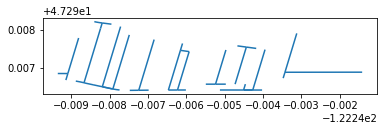

In [67]:
%matplotlib inline
geos.plot()

In [65]:
len(geos)

39

In [18]:
l = geos[1].rstrip().split('^')
del l[4:len(l)]
l

['1', '', 'service', '17.4063292787486']

In [17]:
import numpy as np
np.arange(4,10,2)

array([4, 6, 8])

In [48]:
f = open('map-data/RoadNetworkData/WA_EdgeGeometry0.txt','r')
lines = f.readlines()

In [49]:
record = parse_line(lines[1])

In [52]:
print(record)

0                                                    1
1                                                     
2                                              service
3                                              17.4063
4    LINESTRING (-122.2445086 47.296424, -122.24446...
dtype: object


In [51]:
type(record)

geopandas.geoseries.GeoSeries

In [82]:
import fiona
fiona.supported_drivers

{'ARCGEN': 'r',
 'AeronavFAA': 'r',
 'BNA': 'raw',
 'DGN': 'raw',
 'DXF': 'raw',
 'ESRI Shapefile': 'raw',
 'GPKG': 'rw',
 'GPSTrackMaker': 'raw',
 'GPX': 'raw',
 'GeoJSON': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'OpenFileGDB': 'r',
 'PCIDSK': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [5]:
geos.to_file('roadnetwork.json', driver='GeoJSON')

In [6]:
start_time = time.time()
geos_new = gpd.read_file('roadnetwork.json')
print("--- %s seconds ---" % (time.time() - start_time))

--- 90.9720001221 seconds ---


In [7]:
geos_new.head()

,id,way_type,way_level,way_length,geometry
0,0,Supermall Way,residential,18.023711,"LINESTRING (-122.2445086 47.296424, -122.24426..."
1,1,,service,17.406329,"LINESTRING (-122.2445086 47.296424, -122.24446..."
2,2,Supermall Way,residential,46.507251,"LINESTRING (-122.2445086 47.296424, -122.24512..."
3,3,,service,16.200313,"LINESTRING (-122.2481928 47.2981713, -122.2482..."
4,4,,service,18.480948,"LINESTRING (-122.2481928 47.2981713, -122.2481..."


In [8]:
len(geos_new)

1283540

In [ ]:
def read_nodes(filename):
    '''read network nodes'''
    col_names = ['id', 'node_id', 'lon', 'lat']
    nodes = pd.read_csv(filename, sep=' ', skiprows=1, header=None, names=col_names, index_col='id')
    nodes['geometry'] = nodes.apply(lambda z: Point(z.lon, z.lat), axis=1)
    nodes = gpd.GeoDataFrame(nodes)
    return nodes

In [ ]:
filename = 'map-data/map-porto/vertex.txt'
nodes = read_nodes(filename)
nodes.head()

In [ ]:
def read_edges(filename):
    '''read network edges'''
    col_names = ['id', 'from_v', 'to_v', 'length']
    edges = pd.read_csv(filename, sep=' ', skiprows=2, names=col_names, index_col='id')
    return edges

In [ ]:
filename = 'map-data/map-porto/edges.txt'
edges = read_edges(filename)
edges.info()

In [ ]:
edges.describe().T

In [ ]:
edges.to_records(index=False)['from_v']

In [ ]:
import networkx as nx
G = nx.DiGraph()
for record in edges.to_records(index=False):
    G.add_edge(record['from_v'], record['to_v'], weight=record['length'])

In [ ]:
print(nx.dijkstra_path(G, 0, 2))

In [ ]:
print(nx.dijkstra_path_length(G, 0, 2))

In [ ]:
edges.loc[(edges.from_v==0) & (edges.to_v==7511),:]

In [ ]:
edges.loc[(edges.from_v==0) & (edges.to_v==7511),:].index.values.astype(int)[0]

In [ ]:
edges.loc[(edges.from_v==0) & (edges.to_v==7511),:].index.item()

In [ ]:
def read_streets(filename):
    col_names = ['id','from_v_id','from_lat','from_lon','to_v_id','to_lat','to_lon', 'length', 'level','other']
    streets = pd.read_csv(filename, sep=' ', header=None, skiprows=1, names=col_names, index_col='id')
    return streets

filename = 'map-data/map-porto/streets.txt'
streets=read_streets(filename)
streets.info()
streets.describe().T

In [ ]:
streets['level'].unique()

In [1]:
nodes.describe().T

NameError: name 'nodes' is not defined